## Advanced Regression

### Surprise Housing SalePrice regression model

#### Problem statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

### Step1: Reading and understanding the data:

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd

Import other libraries needed for analysis

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing ML libraries
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Columns and row display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Import file in dataframe
train = pd.read_csv('C:\\Users\\saifr\\Documents\\Python Data files\\train.csv',encoding='UTF-8')
# We can check the encoding using an application or tool like notepad or notepad++

In [4]:
# Let's have a look at the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Let's check for the null values, if any, and other details
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see there are few null values in the dataset and there are a total of 81 columns and 1460 rows

In [6]:
# Let's have a look at the value spread of the variables
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's have a look at the null values in the dataframe

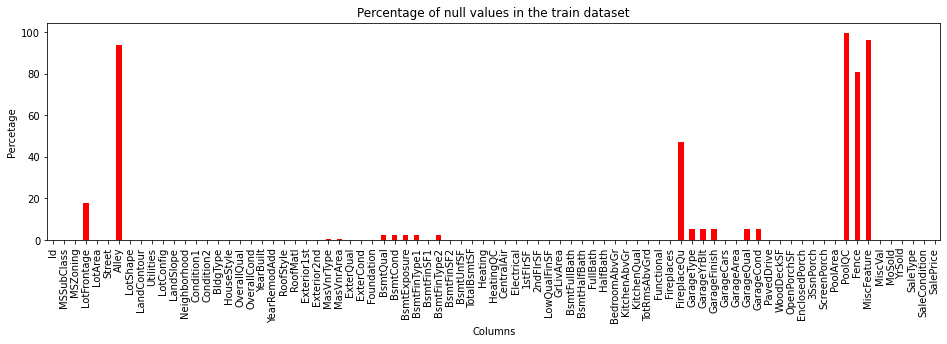

In [7]:
#Let's have a look at the dataset that we have, how many null values
plt.figure(figsize=[16,4])
((train.isnull().sum()/train.isnull().count())*100).plot.bar(color='red').set_title('Percentage of null values in the train dataset')
plt.ylabel('Percetage')
plt.xlabel('Columns')
plt.show()

### Step2: Missing value treatment 

We can see there are high number of null values for few of the columns. So we are going to drop the columns with null values more than 30%

In [8]:
# Dropping columns having null values more than 30%
train.drop(['MiscFeature','PoolQC','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [9]:
#Let's have a look at the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Step3: Analyzing the data

Checking the values of numeric variables - Univariate analysis

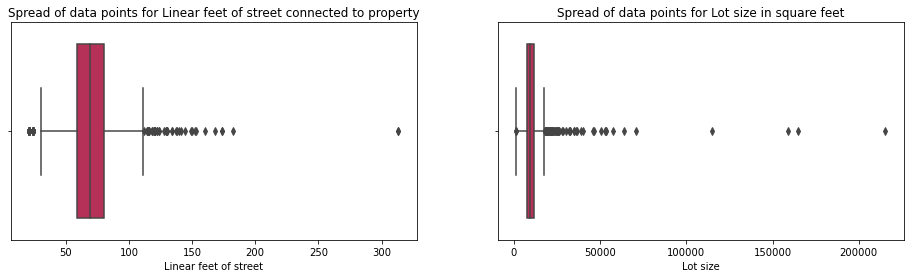

In [10]:
# Checking the spread of data for LotFrontage and LotArea
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
sns.boxplot(x=train['LotFrontage'],data=train, palette = 'rocket').set_title('Spread of data points for Linear feet of street connected to property')
plt.xlabel('Linear feet of street')
plt.subplot(1,2,2)
sns.boxplot(x=train['LotArea'],data=train, palette = 'rocket').set_title('Spread of data points for Lot size in square feet')
plt.xlabel('Lot size')
plt.show()

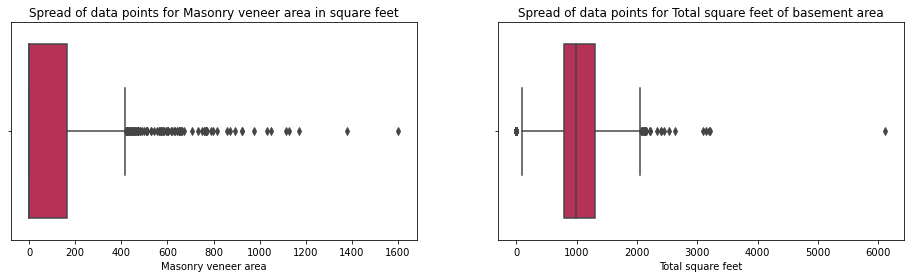

In [11]:
# Checking the spread of data for MasVnrArea and TotalBsmtSF
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
sns.boxplot(x=train['MasVnrArea'],data=train, palette = 'rocket').set_title('Spread of data points for Masonry veneer area in square feet')
plt.xlabel('Masonry veneer area')
plt.subplot(1,2,2)
sns.boxplot(x=train['TotalBsmtSF'],data=train, palette = 'rocket').set_title('Spread of data points for Total square feet of basement area')
plt.xlabel('Total square feet')
plt.show()

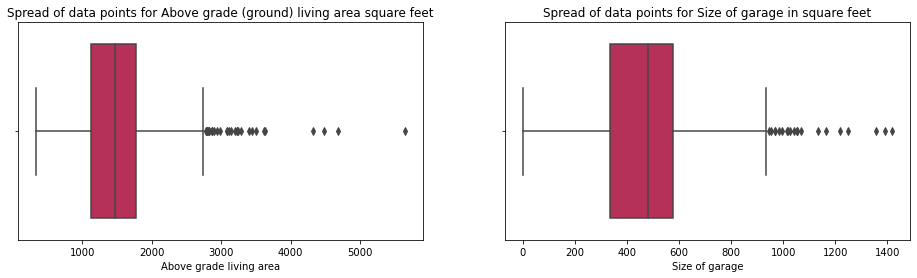

In [12]:
# Checking the spread of data for GrLivArea and GarageArea
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
sns.boxplot(x=train['GrLivArea'],data=train, palette = 'rocket').set_title('Spread of data points for Above grade (ground) living area square feet')
plt.xlabel('Above grade living area')
plt.subplot(1,2,2)
sns.boxplot(x=train['GarageArea'],data=train, palette = 'rocket').set_title('Spread of data points for Size of garage in square feet')
plt.xlabel('Size of garage')
plt.show()

We can see the fields 'LotFrontage' and 'MasVnrArea' have outliers from the description. So we can impute the missing values for these columns with median values. For 'GarageYrBlt', we can use the mean since there is no outlier

We can also see there are very less outliers for 'LotFrontage' beyond 250. So we can eliminate the values above that.

We can also see there are very less outliers for 'LotArea' beyond 100000. So we can eliminate the values above that.

We can also see there are very less outliers for 'TotalBsmtSF' beyond 4000. So we can eliminate the values above that.

In [13]:
# Missing value imputation for the numerical columns
train['LotFrontage']= train.LotFrontage.fillna(train.LotFrontage.median())
train['MasVnrArea']= train.MasVnrArea.fillna(train.MasVnrArea.median())
train['GarageYrBlt']= train.GarageYrBlt.fillna(train.GarageYrBlt.mean())

In [14]:
# Dropping rows for which 'LotFrontage' is more than 250
train = train[train['LotFrontage'] < 250]

In [15]:
# Dropping rows for which 'LotArea' is more than 100000
train = train[train['LotArea'] < 100000]

In [16]:
# Dropping rows for which 'TotalBsmtSF' is more than 4000
train = train[train['TotalBsmtSF'] < 4000]

So now that we have treated the null values for the numerical columns, let's move on to the categorical variables

In [17]:
# Let's have a look at the dataset - fields with null values(object):
train[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']].head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


Now let's have a look at the different value counts for these columns

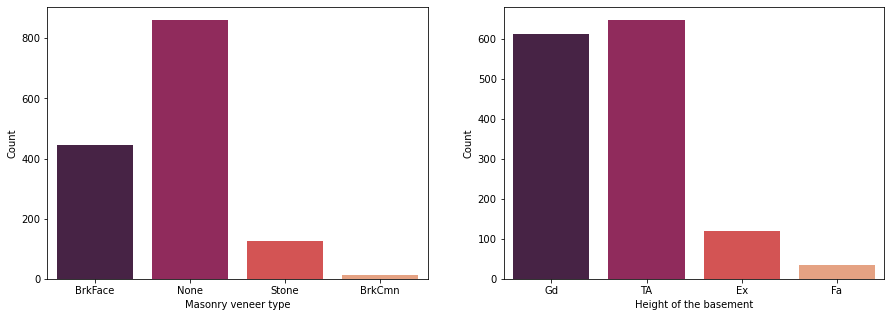

In [18]:
#Checking for value counts for the column variables
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'MasVnrType', data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Masonry veneer type')
plt.subplot(1,2,2)
sns.countplot(x = 'BsmtQual',  data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Height of the basement')
plt.show()

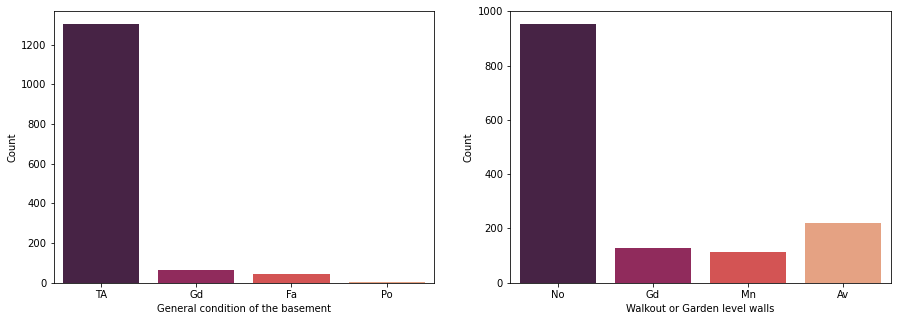

In [19]:
#Checking for value counts for the column variables
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'BsmtCond', data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('General condition of the basement')
plt.subplot(1,2,2)
sns.countplot(x = 'BsmtExposure',  data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Walkout or Garden level walls')
plt.show()

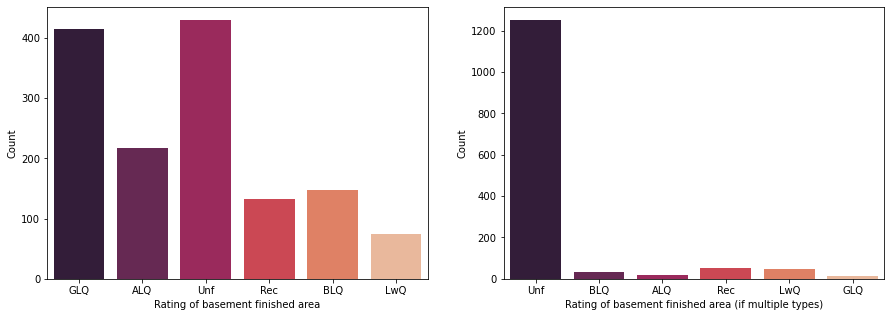

In [20]:
#Checking for value counts for the column variables
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'BsmtFinType1', data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Rating of basement finished area')
plt.subplot(1,2,2)
sns.countplot(x = 'BsmtFinType2',  data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Rating of basement finished area (if multiple types)')
plt.show()

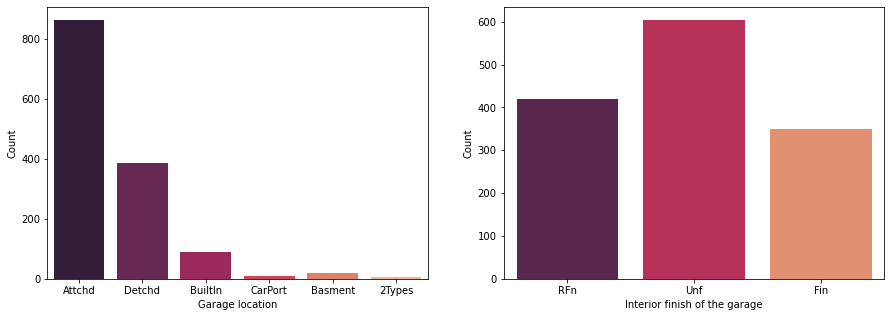

In [21]:
#Checking for value counts for the column variables
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'GarageType', data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Garage location')
plt.subplot(1,2,2)
sns.countplot(x = 'GarageFinish',  data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Interior finish of the garage')
plt.show()

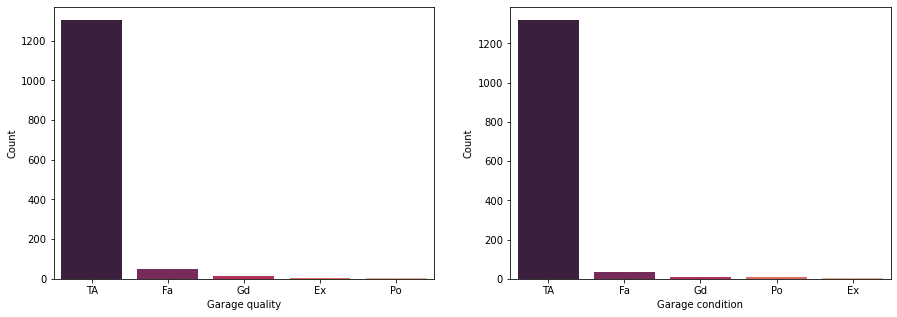

In [22]:
#Checking for value counts for the column variables
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'GarageQual', data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Garage quality')
plt.subplot(1,2,2)
sns.countplot(x = 'GarageCond',  data = train, palette = 'rocket')
plt.ylabel('Count')
plt.xlabel('Garage condition')
plt.show()

### Step4: Data conversion and imputation

We can see a few of the features are having an ordered sequence, which we can transform into numeric variables for building the Learning model. 

In [23]:
# Converting ordered categorical variables into numeric variables to ease computation
train['LotShape'] = train['LotShape'].map({'Reg': '1', 'IR1': '2', 'IR2': '3', 'IR3': '4'})
train['LandSlope'] = train['LandSlope'].map({'Gtl': '1', 'Mod': '2', 'Sev': '3'})
train['ExterQual'] = train['ExterQual'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['ExterCond'] = train['ExterCond'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['BsmtQual'] = train['BsmtQual'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['BsmtCond'] = train['BsmtCond'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['HeatingQC'] = train['HeatingQC'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['KitchenQual'] = train['KitchenQual'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['GarageQual'] = train['GarageQual'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})
train['GarageCond'] = train['GarageCond'].map({'Ex': '5', 'Gd': '4', 'TA': '3', 'Fa': '2', 'Po': '1'})

We can see from the data dictionary, for columns 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' the NA is actually 'No Basement'. So we can impute these with the value known

In [24]:
# Imputing NA with 'No Basement'
train['BsmtQual'] = train['BsmtQual'].fillna('0')
train['BsmtCond'] = train['BsmtCond'].fillna('0')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')
train['BsmtFinType2'] = train['BsmtFinType1'].fillna('No Basement')

In [25]:
# The varible ID should not be numerical in this dataframe. Thus converting it to categorical variable since id has no direct relation for salesprice
train['Id'] = train['Id'].astype('object')

In [26]:
# Let's have a look at the data.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,1,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,GLQ,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,1,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,ALQ,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,2,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,GLQ,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,2,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,ALQ,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,2,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,GLQ,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


We can see from the data dictionary, for columns 'GarageType','GarageFinish','GarageQual','GarageCond' the NA is actually 'No Garage'. So we can impute these with the value known

In [27]:
# Imputing NA with 'No Garage' and '0' for different kind of variables 
train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('0')
train['GarageCond'] = train['GarageCond'].fillna('0')

In [28]:
#Checking values for Electrical feature
train['Electrical'].value_counts()

SBrkr    1328
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
#Checking values for MasVnrType feature
train['MasVnrType'].value_counts()

None       861
BrkFace    445
Stone      126
BrkCmn      14
Name: MasVnrType, dtype: int64

In [30]:
#Imputing 'Electrical' missing value with 'SBrkr' and 'MasVnrType' with 'None' since they are the most widely used in those fields
train['Electrical']= train['Electrical'].fillna('SBrkr')
train['MasVnrType']= train['MasVnrType'].fillna('None')

In [31]:
#Checking values for MasVnrType feature
train['LotShape'].value_counts()

1    925
2    483
3     38
4      8
Name: LotShape, dtype: int64

In [32]:
#Imputing 'LotShape' missing value with '1' since it is the most widely used
train['LotShape']= train['LotShape'].fillna('1')

In [33]:
# Converting the type of the numeric variables into numbers
train['LotFrontage'] = train['LotFrontage'].astype('int32')
train['LotShape'] = train['LotShape'].astype('int32')
train['LandSlope'] = train['LandSlope'].astype('int64')
train['ExterQual'] = train['ExterQual'].astype('int64')
train['ExterCond'] = train['ExterCond'].astype('int64')
train['BsmtQual'] = train['BsmtQual'].astype('int64')
train['BsmtCond'] = train['BsmtCond'].astype('int64')
train['HeatingQC'] = train['HeatingQC'].astype('int64')
train['KitchenQual'] = train['KitchenQual'].astype('int64')
train['GarageQual'] = train['GarageQual'].astype('int64')
train['GarageCond'] = train['GarageCond'].astype('int64')
train['MasVnrArea'] = train['MasVnrArea'].astype('int64')

In [34]:
# Converting the type of GarageYrBlt into int64
train['GarageYrBlt'] = train['GarageYrBlt'].astype('int64')

In [35]:
#check for null values across columns in percentage of total values
round((train.isnull().sum()/len(train.index))*100).head()

Id             0.0
MSSubClass     0.0
MSZoning       0.0
LotFrontage    0.0
LotArea        0.0
dtype: float64

So we finally have a dataset with no null values. Now we can move ahead with our analysis.

In [36]:
# In the data dictionary, we can see a few numerical variables represent categorical data like 'MSSubClass'
# Replacing numerical variables with categorical variables for 'MSSubClass'
train['MSSubClass'] = train['MSSubClass'].replace(
       {20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [37]:
# Let's have a look at the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65,8450,Pave,1,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,No,GLQ,706,GLQ,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80,9600,Pave,1,Lvl,AllPub,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,Gd,ALQ,978,ALQ,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68,11250,Pave,2,Lvl,AllPub,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,Mn,GLQ,486,GLQ,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60,9550,Pave,2,Lvl,AllPub,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,No,ALQ,216,ALQ,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84,14260,Pave,2,Lvl,AllPub,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,Av,GLQ,655,GLQ,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Now we have to analyse the variables that are contributing to the sale price. For that we can visualise using scatterplot for numerical variables and boxplot for categorical variables

In [38]:
# The list of numerical variables are:
numerics = ['int64', 'float64']
numdf = train.select_dtypes(include=numerics)
numlist = list(numdf.columns)
print('Number of numeric variables: ',len(numlist))

Number of numeric variables:  44


In [39]:
# Removing 'SalePrice' from the numerical list since 'SalePrice' is our target variable
numlist.remove('SalePrice')

In [40]:
# The list of categorical variables are:
catvars = ['object']
catdf = train.select_dtypes(include=catvars)
catlist = list(catdf.columns)
print('Number of categorical variables: ',len(catlist))

Number of categorical variables:  30


In [41]:
# Removing 'Id' from the categorical list since 'Id' is not related to SalePrice, which is our target variable
catlist.remove('Id')

### Step5: Data visualization

Now that we have the list of columns for the numeric and categorical variables, we can visualise using seaborn and understand the relation with the target variable - 'SalePrice'

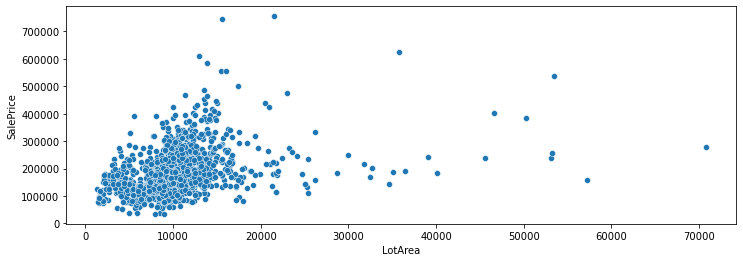

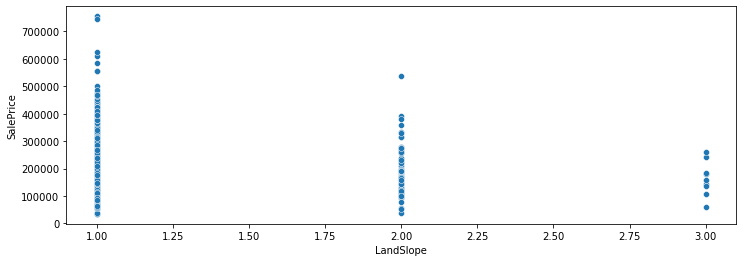

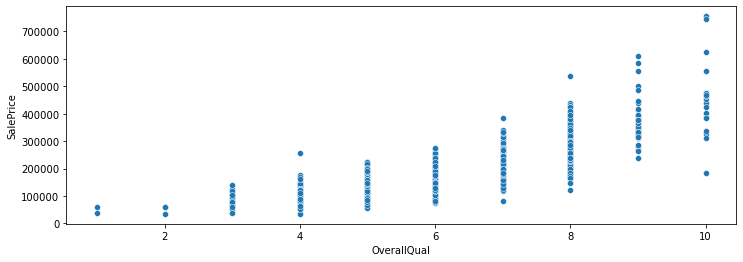

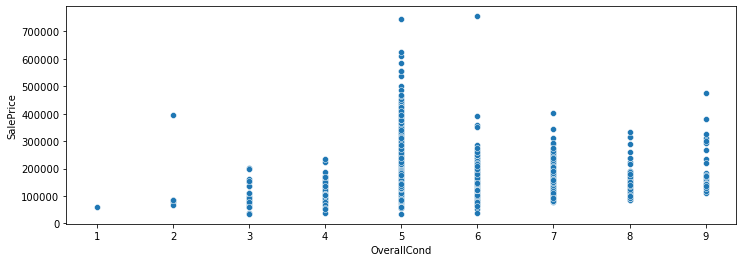

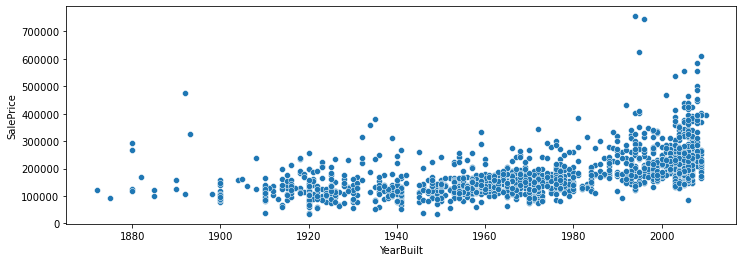

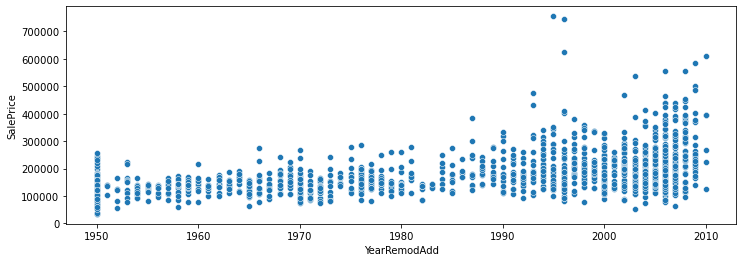

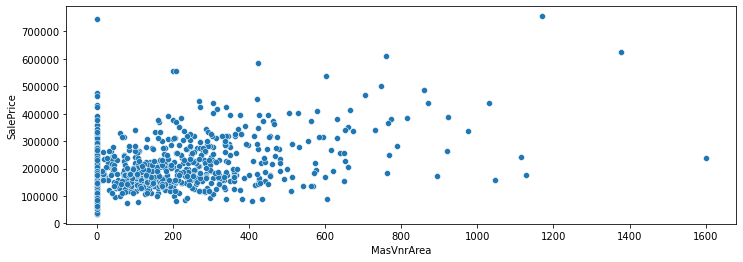

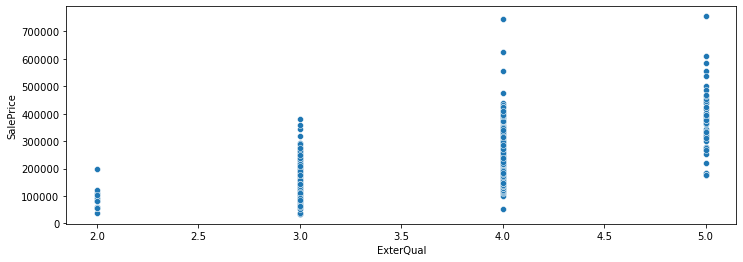

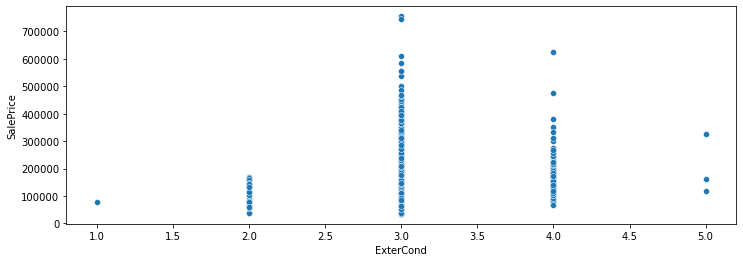

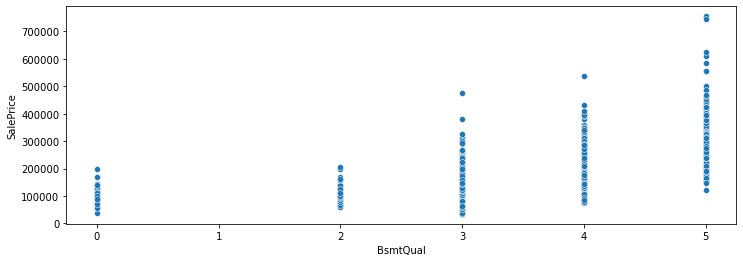

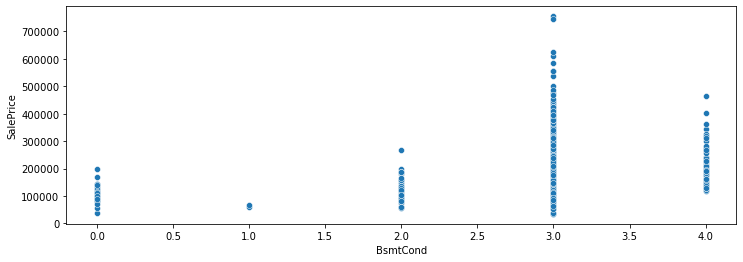

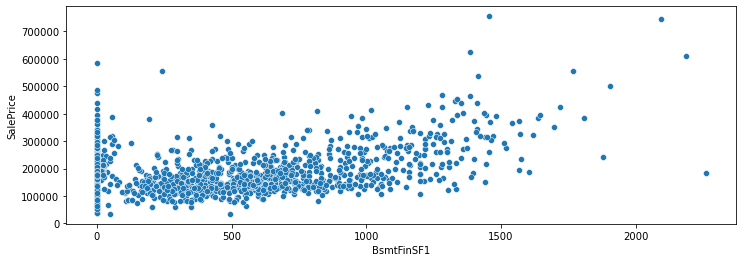

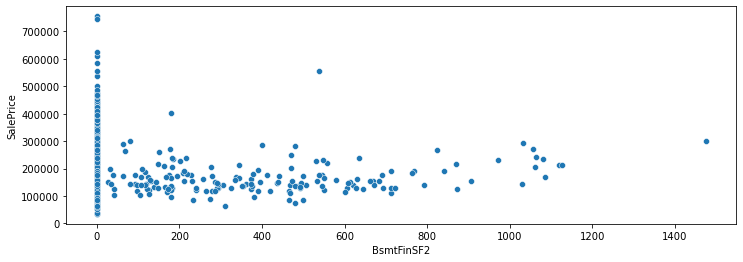

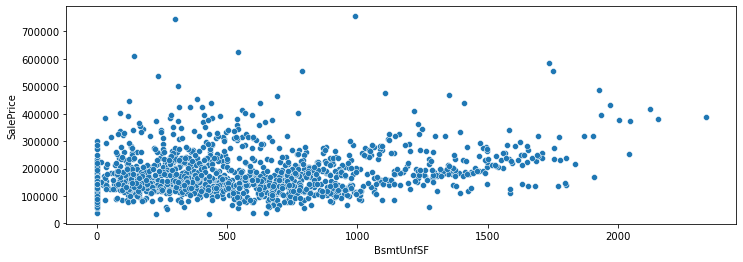

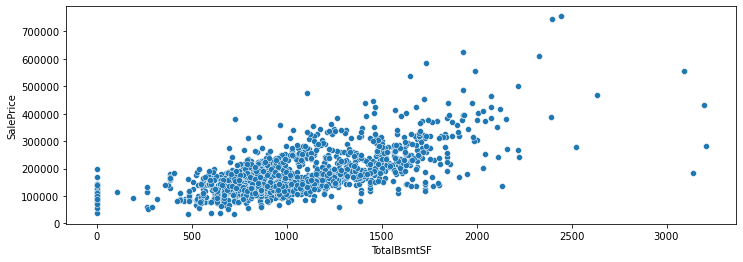

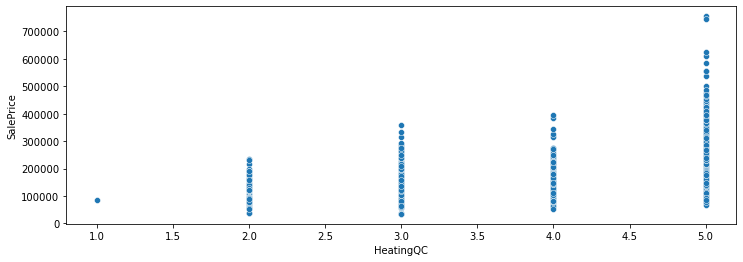

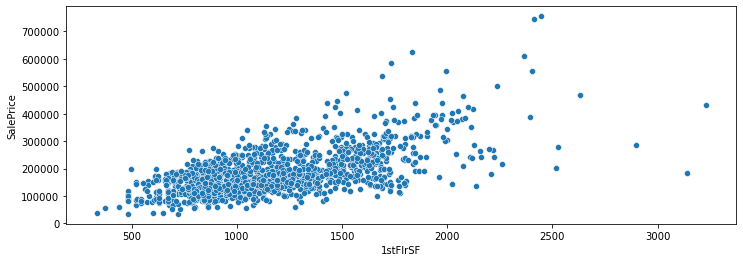

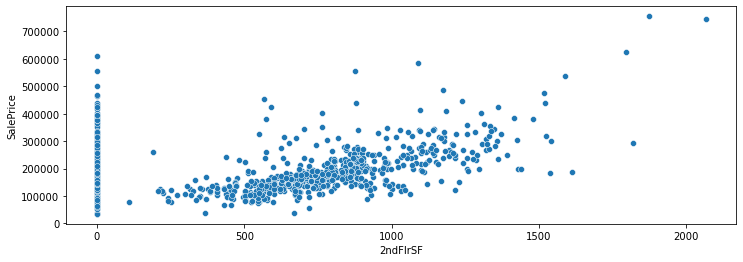

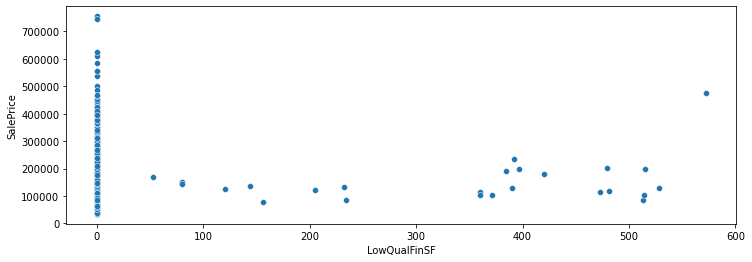

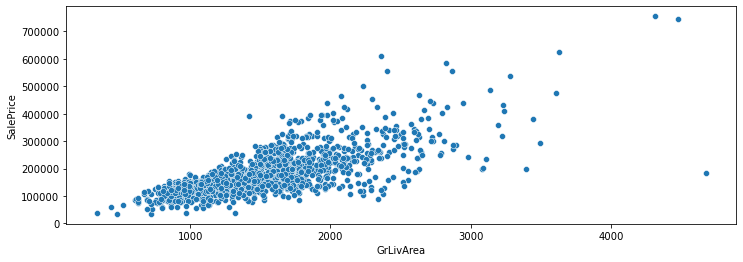

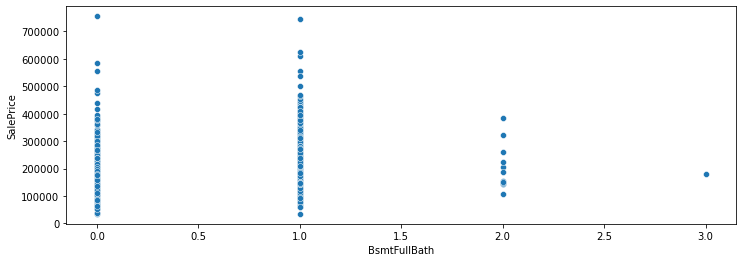

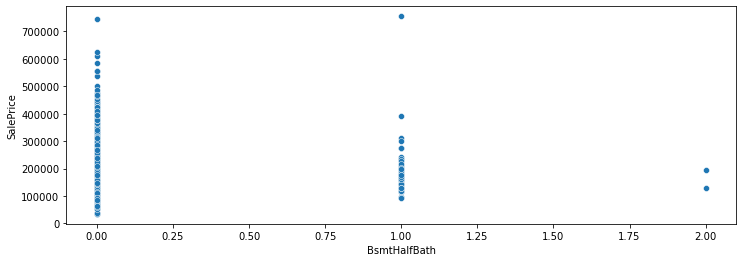

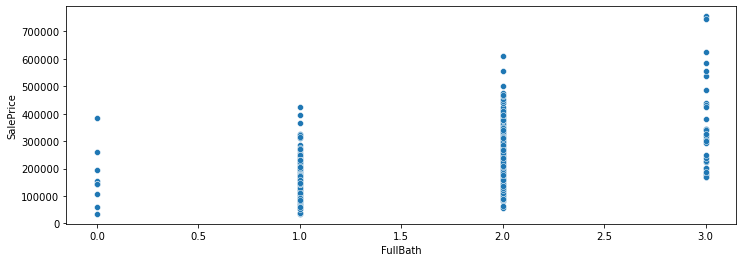

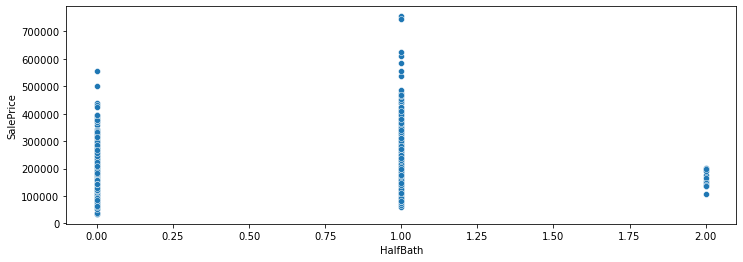

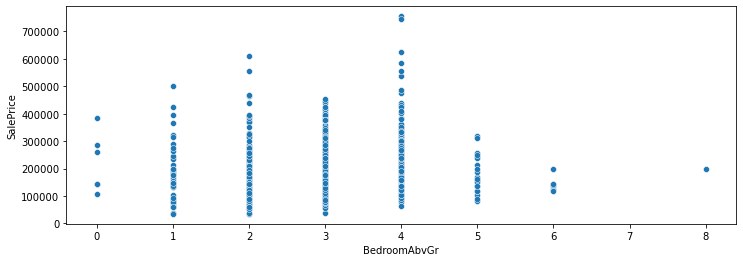

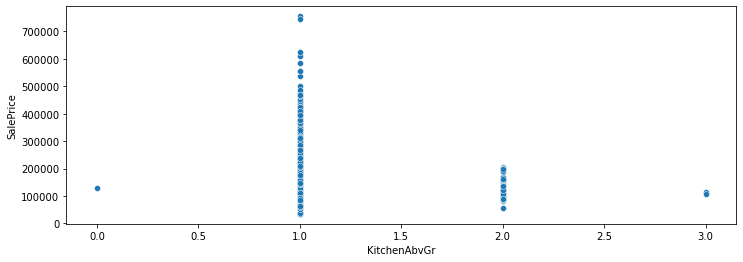

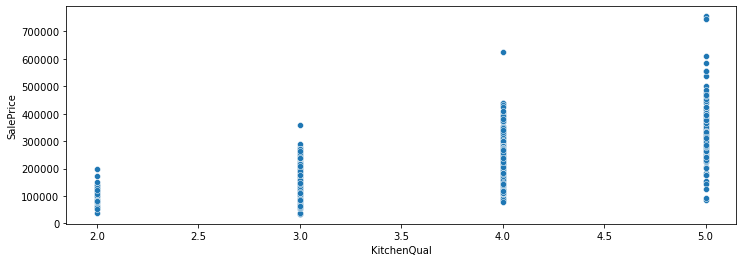

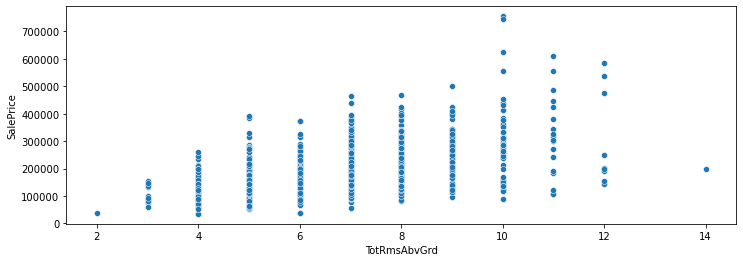

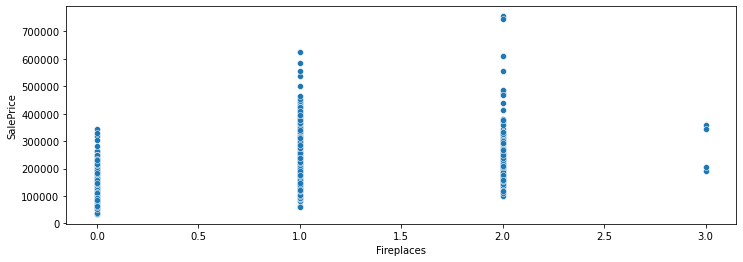

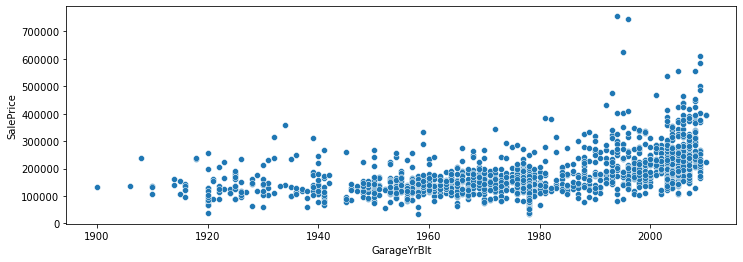

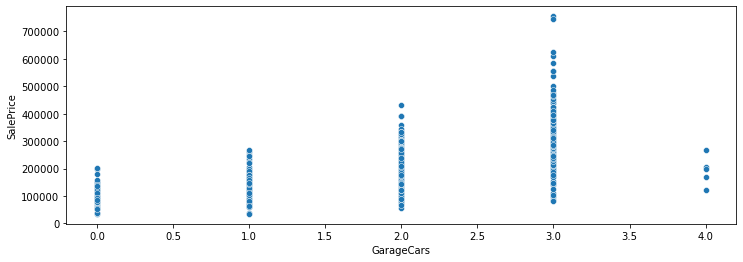

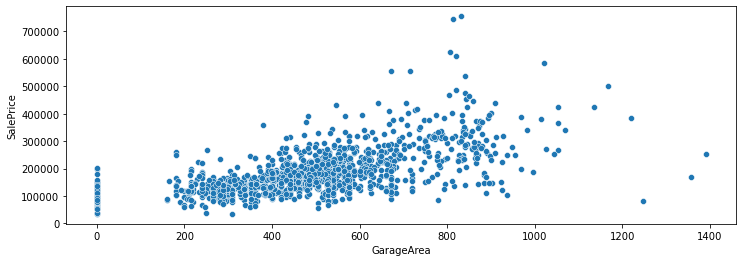

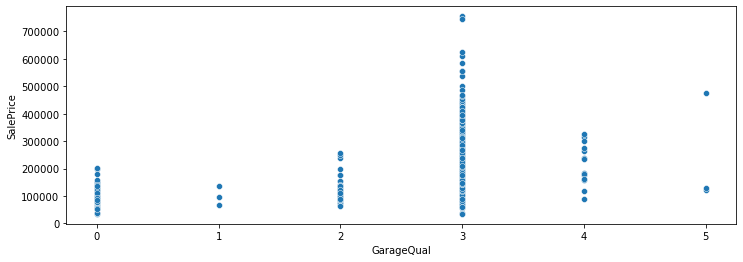

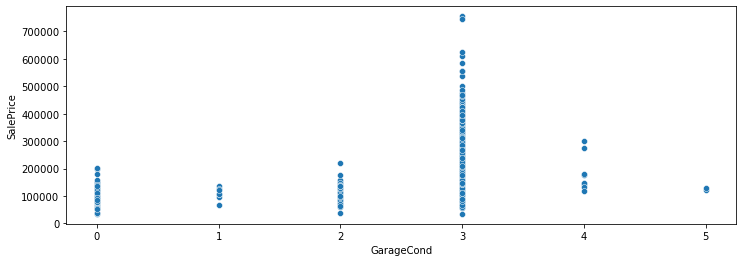

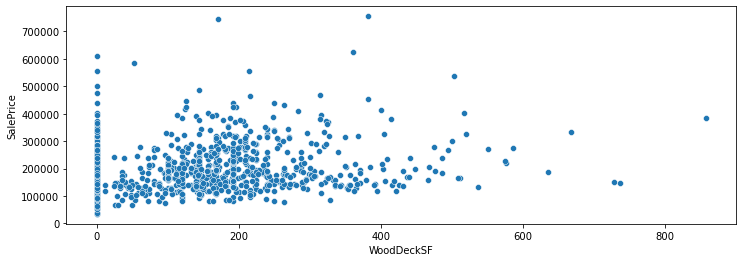

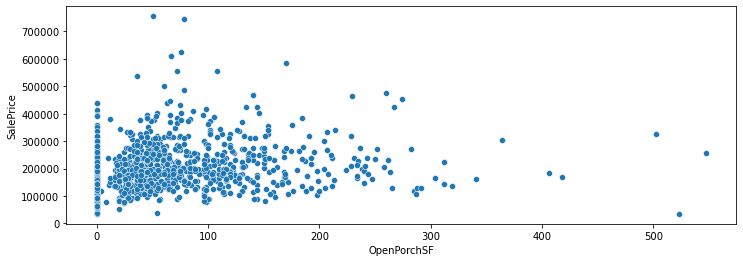

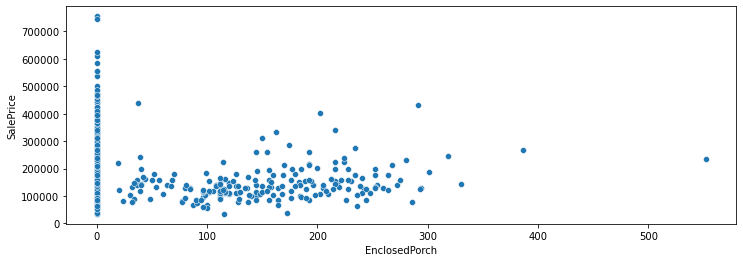

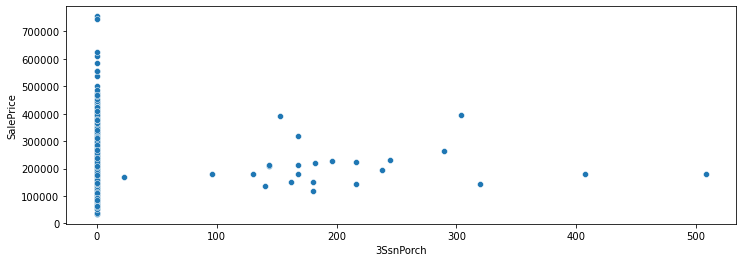

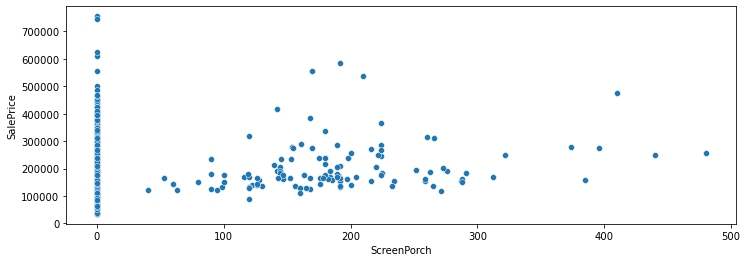

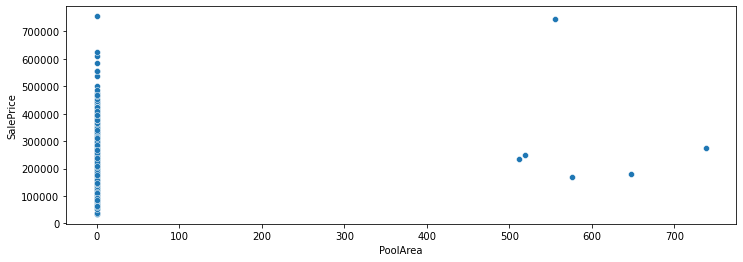

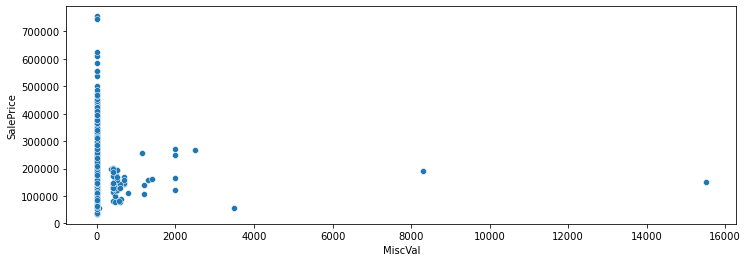

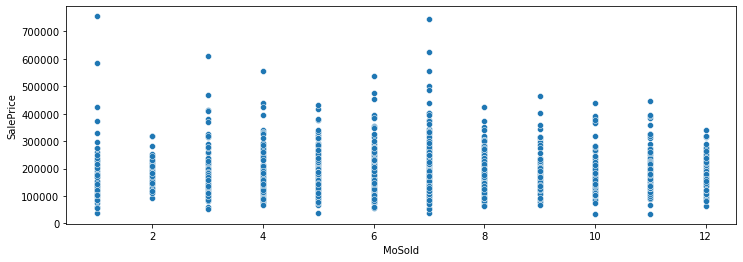

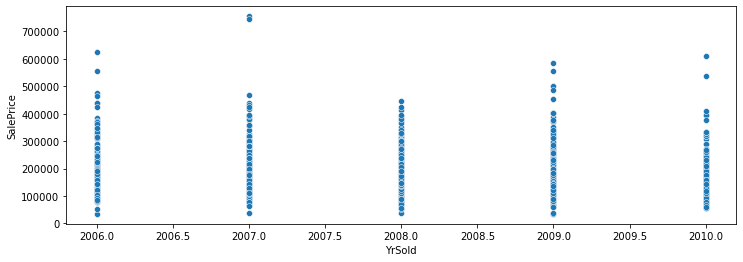

In [42]:
# Visualising the relation of different numerical variables with respect to SalePrice using seaborn scatterplot
for i in numlist:
    plt.figure(figsize=[12,4])
    sns.scatterplot(y = train['SalePrice'],x = train[i], data=train, palette = 'rocket')
    plt.show()

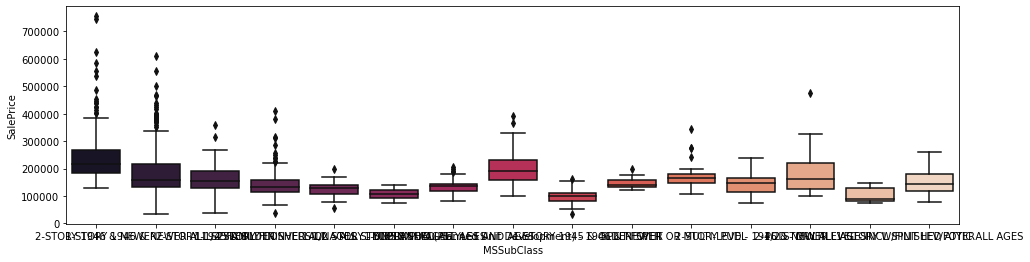

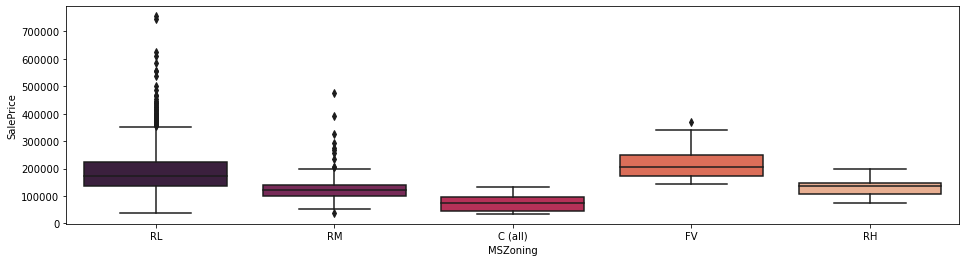

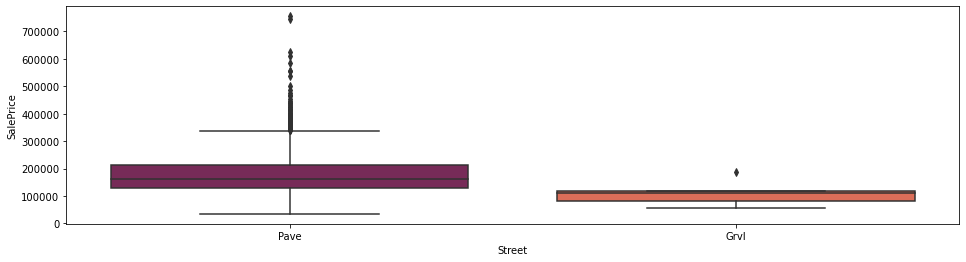

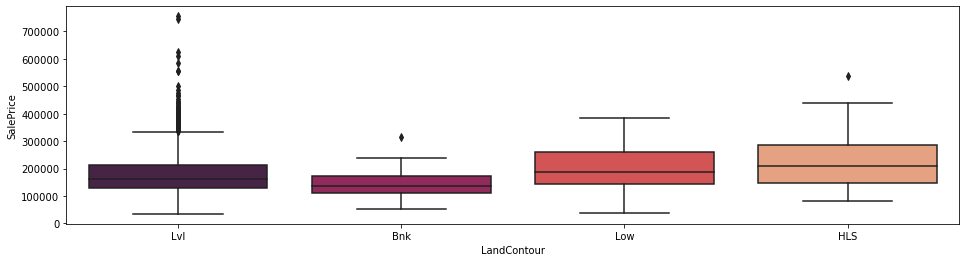

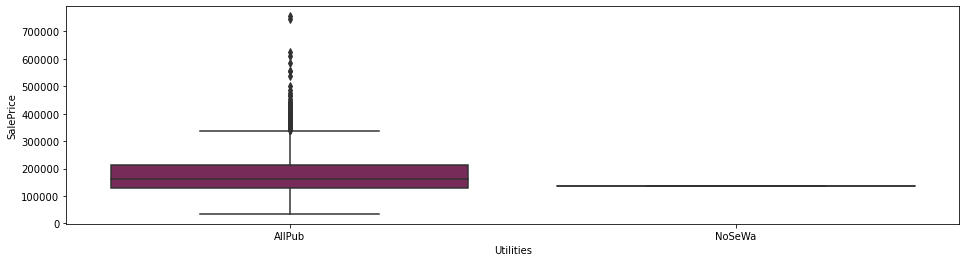

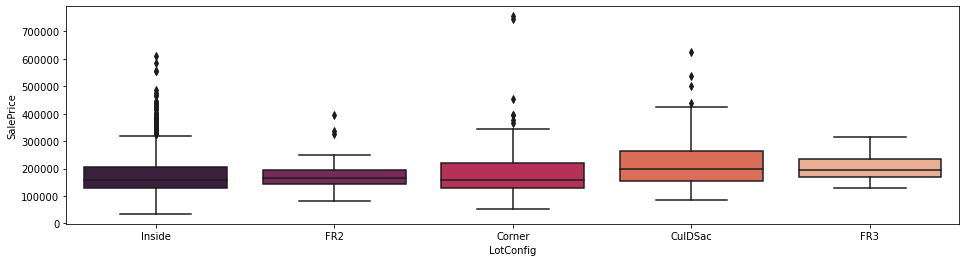

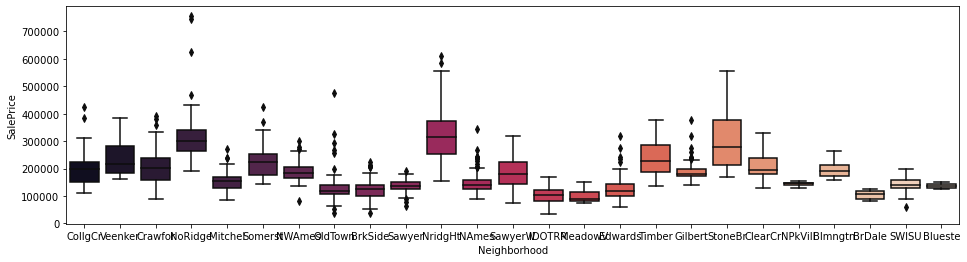

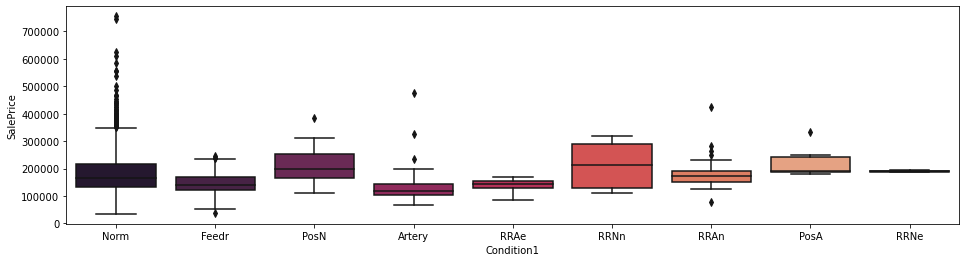

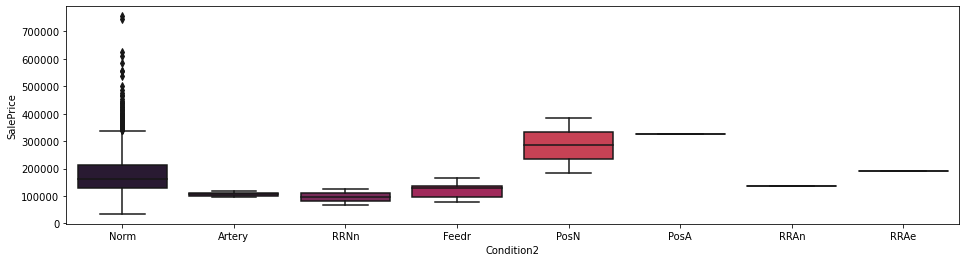

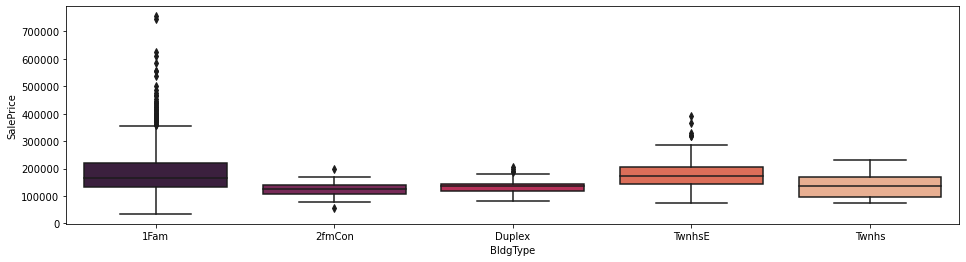

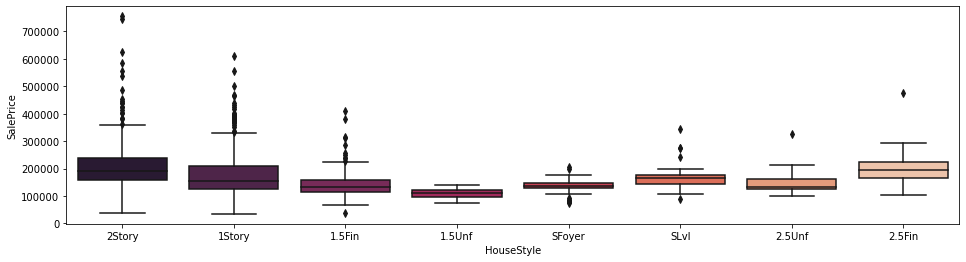

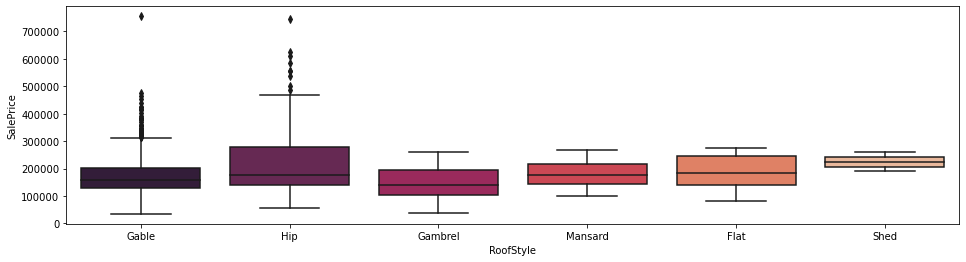

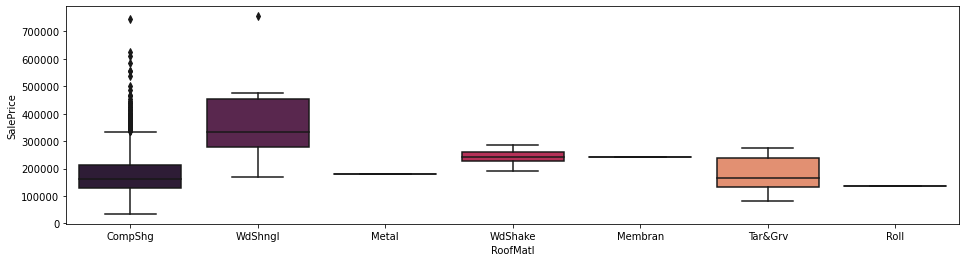

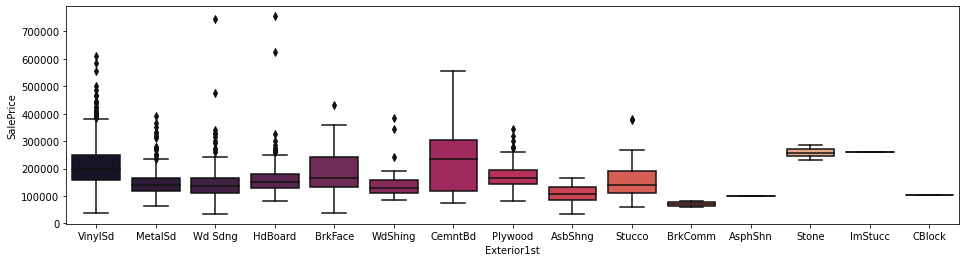

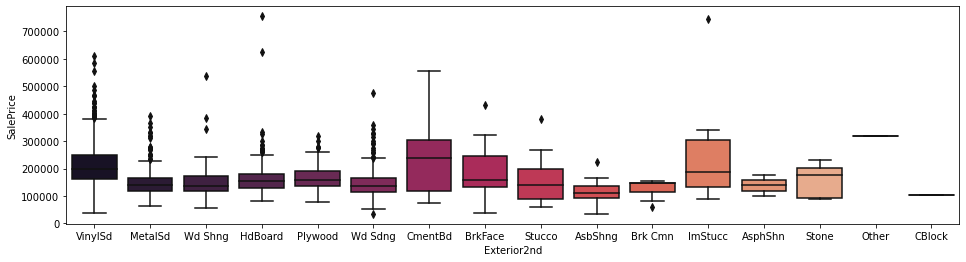

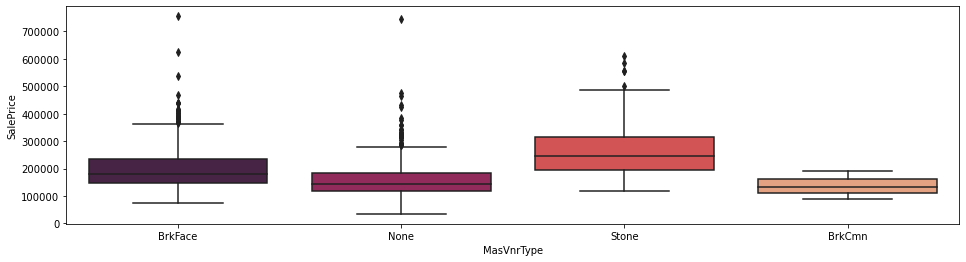

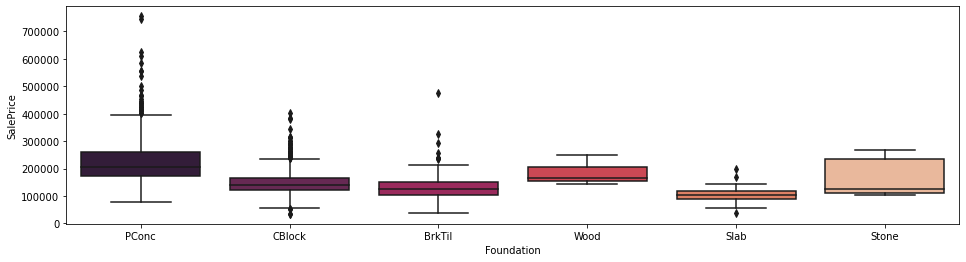

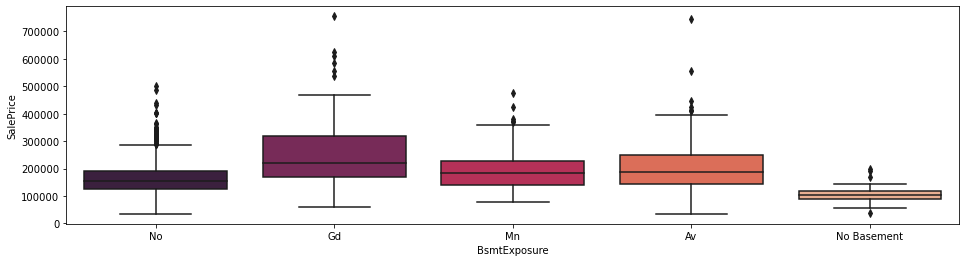

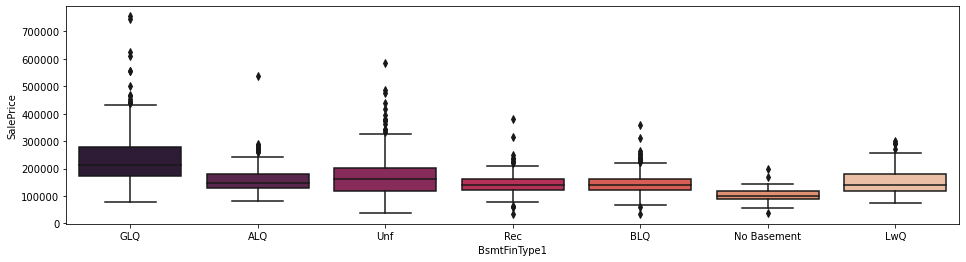

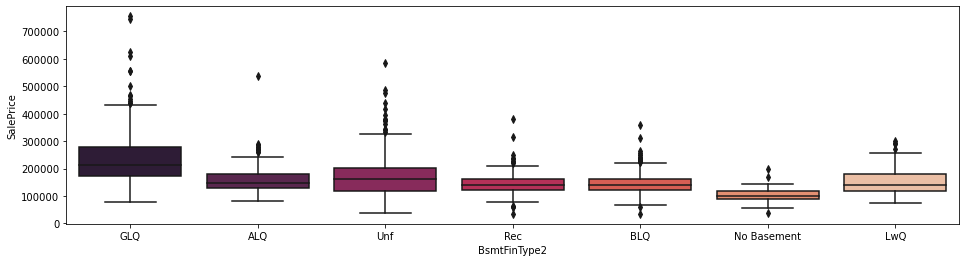

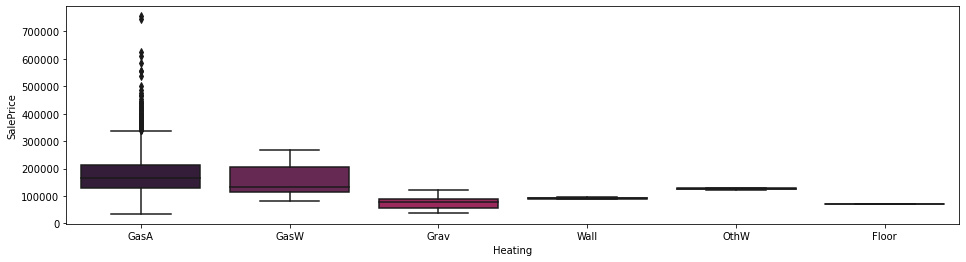

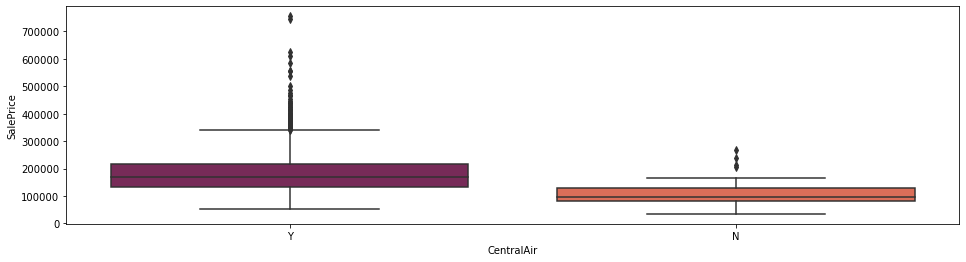

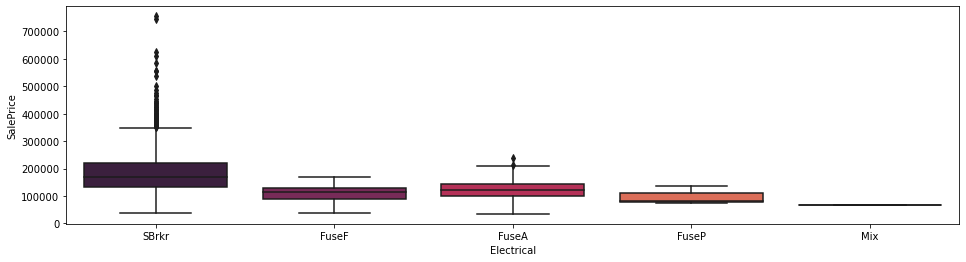

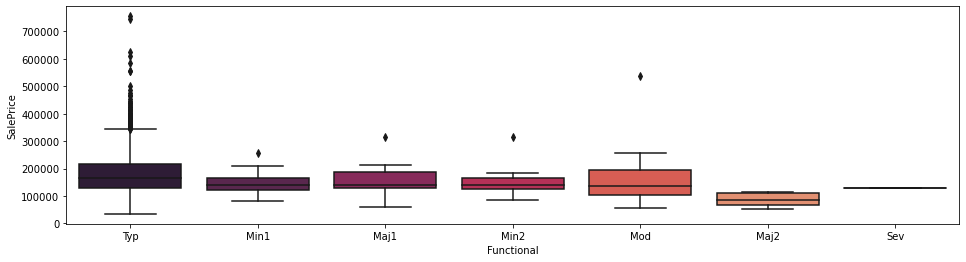

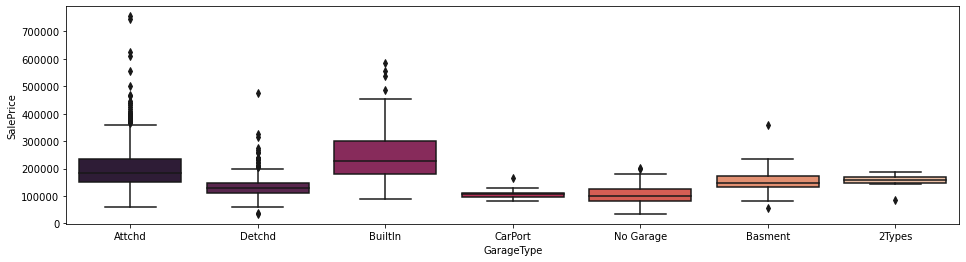

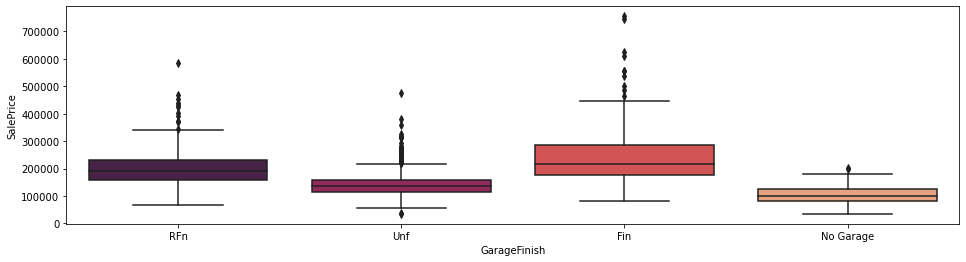

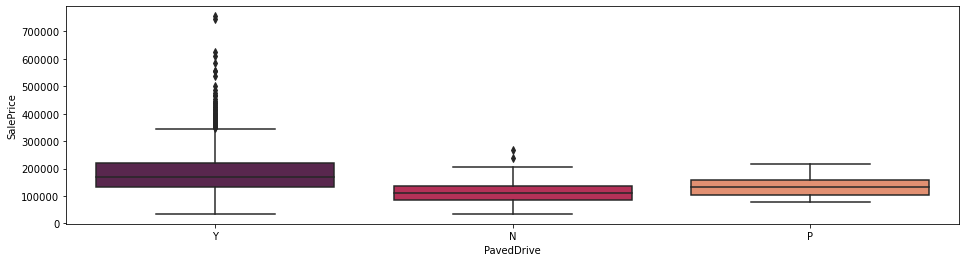

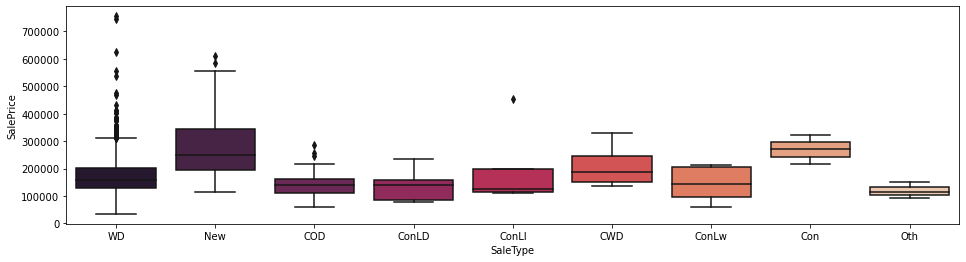

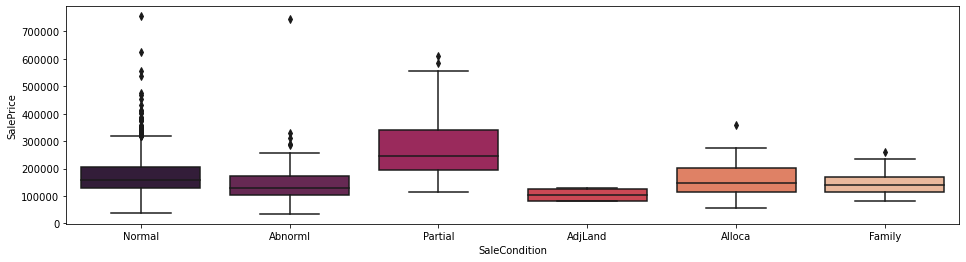

In [43]:
# Visualising the relation of different categorical variables with respect to SalePrice using seaborn boxplot
for j in catlist:
    plt.figure(figsize=[16,4])
    sns.boxplot(y = train['SalePrice'],x = train[j], data=train, palette = 'rocket')
    plt.show()

### Step5: Dummy variable creation

In [44]:
# Converting all categorical variables to dummy variables to build linear regression model
# Dropping first column to eliminate redundency
# Renaming columns of the new features
# Delete existing columns after getting the dummy variables
for c in catlist:
    catdum = pd.get_dummies(train[c], drop_first = True) 
    catdum = catdum.add_prefix(f'{c}_')
    train = pd.concat([train, catdum], axis = 1)
    train.drop([c], axis = 1, inplace = True)

In [45]:
# Dropping Id from the train dataset since this feature has no relation with SalesPrice
train.drop('Id',axis=1,inplace=True)

In [46]:
# Let's have a look at the data.
train.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450

In [47]:
# Checking for features having related data - We can see features like BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF are all basement area
# We can keep the the total and drop the others from the dataframe
train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [48]:
# Checking for features having high correlation - above 0.80
train_cor = train.corr().abs()
cor1 = train_cor.where(np.triu(np.ones(train_cor.shape), k=1).astype(np.bool))
hcorr = [col for col in cor1.columns if any(cor1[col] >= 0.80)]
print('Features with high correlation: ', hcorr)

Features with high correlation:  ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageCond', 'MSZoning_RM', 'Neighborhood_Somerst', 'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Hip', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'BsmtExposure_No Basement', 'BsmtFinType1_No Basement', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_No Basement', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'GarageType_No Garage', 'GarageFinish_No Garage', 'SaleCondition_Partial']


In [49]:
# Dropping features that have high correlation - above 0.80
train.drop(hcorr, axis=1, inplace=True)

In [50]:
# Checking the information of the train dataset after data treatment
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Columns: 195 entries, LotFrontage to SaleCondition_Normal
dtypes: int32(2), int64(37), uint8(156)
memory usage: 696.8 KB


In [51]:
# Let's have a look at the data.
train.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,65,8450,1,1,7,5,2003,2003,196,4,3,4,3,856,5,854,0,1710,1,0,2,1,3,1,4,0,2003,2,3,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,80,9600,1,1,6,8,1976,1976,0,3,3,4,3,1262,5,0,0,1262,0,1,2,0,3,1,3,1,1976,2,3,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,0,0,0,0,0,0,0,0

### Step6: Data Preparation:

Now we are going to split the data into response and predictor variables and divide the dataset into two parts - train set and test set

#### Rescaling the numerical variables

In [52]:
#Instantiate an object for scaling
scaler = StandardScaler()

#Create a list of numeric variables to scale
num_vars = ['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']

#### Train test split

In [53]:
# Let's have a look at the data.
train.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,65,8450,1,1,7,5,2003,2003,196,4,3,4,3,856,5,854,0,1710,1,0,2,1,3,1,4,0,2003,2,3,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,80,9600,1,1,6,8,1976,1976,0,3,3,4,3,1262,5,0,0,1262,0,1,2,0,3,1,3,1,1976,2,3,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [54]:
# split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(train, train_size=0.7, test_size = 0.3, random_state=65)

In [55]:
# Transform and Fit on the original dataset
# Fitting and transforming the data with scaler into train set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# Transforming the data with scaler into test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [56]:
df_test.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
657,-0.473020,-0.505644,1,2,7,6,1931,2000,-0.576355,3,2,4,3,-0.647781,3,0.699936,0,-0.005876,0,0,1,1,3,1,3,1,1931,1,3,-0.766295,-0.715332,1.461558,0,0,0,0,2,2008,-0.378131,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
61,-0.473020,-0.505644,1,1,5,7,1920,1996,-0.576355,3,3,3,2,-1.225773,3,0.42

In [57]:
# Transform and Fit on the original dataset
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Step7: Model creation: Linear regression without regularisation

In [58]:
# Instantiate lm model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

print('Metric values without regularisation')
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for train dataset:', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for test dataset:', r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS value for train dataset:', rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS value for test dataset:', rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE value for train dataset:', mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE value for test dataset:', mse_test_lr)

Metric values without regularisation
R2 value for train dataset: 0.9207882166055086
R2 value for test dataset: 0.8552335126609522
RSS value for train dataset: 80.55838371219778
RSS value for test dataset: 52.67282632284024
RMSE value for train dataset: 0.07921178339449143
RMSE value for test dataset: 0.1205327833474605


So we can see, without regularisation the train dataset has high R-squared value whereas the test set has low R-squared value which suggests there is overfitting.

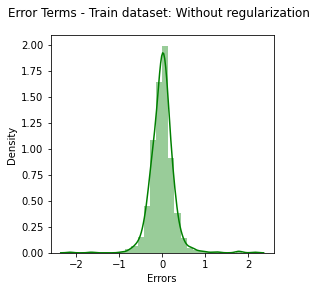

In [60]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_train - y_pred_train), bins = 30,color='green')
fig.suptitle('Error Terms - Train dataset: Without regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

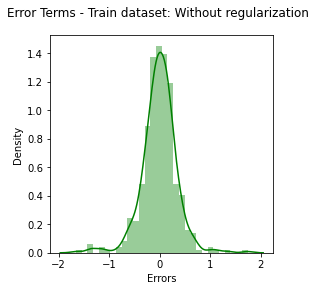

In [61]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_test - y_pred_test), bins = 30, color='green')
fig.suptitle('Error Terms - Train dataset: Without regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

### Step8: Model creation: Ridge and Lasso regularisation

#### Ridge regularisation

In [62]:
# To get the optimal value for alpha, we are going to use a list of values and check using GridSearchCV
list1 = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01, 0.05, 0.5, 1.0, 5.0, 10, 13, 15, 17, 20, 50, 70, 100, 120, 300, 500, 1000, 10000]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = list1, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01,
                                   0.05, 0.5, 1.0, 5.0, 10, 13, 15, 17, 20, 50,
                                   70, 100, 120, 300, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Most optimum hyperparameter value
print('Best hyperparameter value for Ridge regularisation:', model_cv.best_params_)

Best hyperparameter value for Ridge regularisation: {'alpha': 15}


In [64]:
#Fitting Ridge model for alpha = 15
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=15)

In [65]:
# Now let's calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('Metric values with Ridge regularization')
r2_train_lr_rd = r2_score(y_train, y_pred_train)
print('R2 value for train dataset:', r2_train_lr_rd)

r2_test_lr_rd = r2_score(y_test, y_pred_test)
print('R2 value for test dataset:', r2_test_lr_rd)

rss1_lr_rd = np.sum(np.square(y_train - y_pred_train))
print('RSS value for train dataset:', rss1_lr_rd)

rss2_lr_rd = np.sum(np.square(y_test - y_pred_test))
print('RSS value for test dataset:', rss2_lr_rd)

mse_train_lr_rd = mean_squared_error(y_train, y_pred_train)
print('RMSE value for train dataset:', mse_train_lr_rd)

mse_test_lr_rd = mean_squared_error(y_test, y_pred_test)
print('RMSE value for test dataset:', mse_test_lr_rd)

Metric values with Ridge regularization
R2 value for train dataset: 0.9004635346591217
R2 value for test dataset: 0.8816646983755758
RSS value for train dataset: 101.22858525167325
RSS value for test dataset: 43.055923403917305
RMSE value for train dataset: 0.09953646534087832
RMSE value for test dataset: 0.09852614051239658


Here, we can see the train and test sets perform well with R-squared values of **0.90** and **0.88** respectively

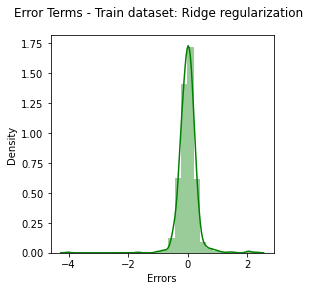

In [66]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_train - y_pred_train), bins = 30, color='green')
fig.suptitle('Error Terms - Train dataset: Ridge regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

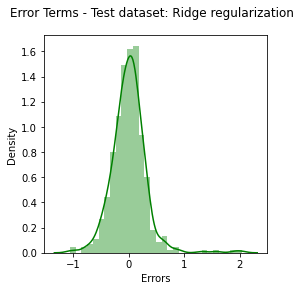

In [67]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_test - y_pred_test), bins = 30, color='green')
fig.suptitle('Error Terms - Test dataset: Ridge regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

#### Question

In [68]:
#Fitting Ridge model for alpha = 15*2 = 30
alpha = 30
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=30)

In [69]:
# Now let's calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

print('Metric values with Ridge regularization with double value of alpha')
r2_train_lr_rd = r2_score(y_train, y_pred_train)
print('R2 value for train dataset:', r2_train_lr_rd)

r2_test_lr_rd = r2_score(y_test, y_pred_test)
print('R2 value for test dataset:', r2_test_lr_rd)

rss1_lr_rd = np.sum(np.square(y_train - y_pred_train))
print('RSS value for train dataset:', rss1_lr_rd)

rss2_lr_rd = np.sum(np.square(y_test - y_pred_test))
print('RSS value for test dataset:', rss2_lr_rd)

mse_train_lr_rd = mean_squared_error(y_train, y_pred_train)
print('RMSE value for train dataset:', mse_train_lr_rd)

mse_test_lr_rd = mean_squared_error(y_test, y_pred_test)
print('RMSE value for test dataset:', mse_test_lr_rd)

Metric values with Ridge regularization with double value of alpha
R2 value for train dataset: 0.8936065761550029
R2 value for test dataset: 0.8810643058590774
RSS value for train dataset: 108.20211205036203
RSS value for test dataset: 43.27437431288349
RMSE value for train dataset: 0.10639342384499709
RMSE value for test dataset: 0.09902602817593475


#### Lasso regularisation

In [70]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = list1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.01,
                                   0.05, 0.5, 1.0, 5.0, 10, 13, 15, 17, 20, 50,
                                   70, 100, 120, 300, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Most optimum hyperparameter value
print('Best hyperparameter value for Lasso regularisation:', model_cv.best_params_)

Best hyperparameter value for Lasso regularisation: {'alpha': 0.002}


In [72]:
#Fitting Ridge model for alpha = 0.002

alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Lasso regularization
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('Metric values with Lasso regularization')
r2_train_lr_ls = r2_score(y_train, y_pred_train)
print('R2 value for train dataset:', r2_train_lr_ls)

r2_test_lr_ls = r2_score(y_test, y_pred_test)
print('R2 value for test dataset:', r2_test_lr_ls)

rss1_lr_ls = np.sum(np.square(y_train - y_pred_train))
print('RSS value for train dataset:', rss1_lr_ls)

rss2_lr_ls = np.sum(np.square(y_test - y_pred_test))
print('RSS value for test dataset:', rss2_lr_ls)

mse_train_lr_ls = mean_squared_error(y_train, y_pred_train)
print('RMSE value for train dataset:', mse_train_lr_ls)

mse_test_lr_ls = mean_squared_error(y_test, y_pred_test)
print('RMSE value for test dataset:', mse_test_lr_ls)

Metric values with Lasso regularization
R2 value for train dataset: 0.9034048012778845
R2 value for test dataset: 0.8854222456486253
RSS value for train dataset: 98.23731710039154
RSS value for test dataset: 41.688751770819245
RMSE value for train dataset: 0.09659519872211557
RMSE value for test dataset: 0.09539760130622253


Here, we can see the train and test sets perform well with R-squared values of **0.90** and **0.88** respectively

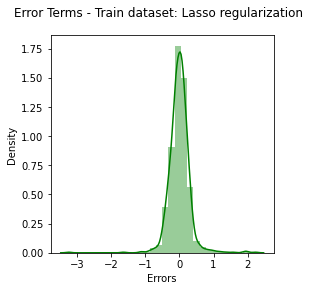

In [74]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_train - y_pred_train), bins = 30, color='green')
fig.suptitle('Error Terms - Train dataset: Lasso regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

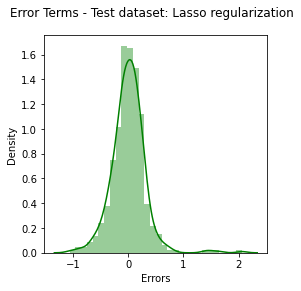

In [75]:
fig = plt.figure(figsize=[4,4])
sns.distplot((y_test - y_pred_test), bins = 30, color='green')
fig.suptitle('Error Terms - Test dataset: Lasso regularization', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 10) 
plt.ylabel('Density', fontsize = 10) 
plt.show()

We can see the error terms are also normally distributed with mean at zero

#### Question

In [76]:
#Fitting Ridge model for alpha = 0.002*2 = 0.004

alpha = 0.004
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.004)

In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Lasso regularization with double value of alpha
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

print('Metric values with Lasso regularization with double value of alpha')
r2_train_lr_ls = r2_score(y_train, y_pred_train)
print('R2 value for train dataset:', r2_train_lr_ls)

r2_test_lr_ls = r2_score(y_test, y_pred_test)
print('R2 value for test dataset:', r2_test_lr_ls)

rss1_lr_ls = np.sum(np.square(y_train - y_pred_train))
print('RSS value for train dataset:', rss1_lr_ls)

rss2_lr_ls = np.sum(np.square(y_test - y_pred_test))
print('RSS value for test dataset:', rss2_lr_ls)

mse_train_lr_ls = mean_squared_error(y_train, y_pred_train)
print('RMSE value for train dataset:', mse_train_lr_ls)

mse_test_lr_ls = mean_squared_error(y_test, y_pred_test)
print('RMSE value for test dataset:', mse_test_lr_ls)

Metric values with Lasso regularization with double value of alpha
R2 value for train dataset: 0.8865506748971219
R2 value for test dataset: 0.8770329298527025
RSS value for train dataset: 115.37796362962702
RSS value for test dataset: 44.74117766032211
RMSE value for train dataset: 0.11344932510287808
RMSE value for test dataset: 0.1023825575751078


### Step9: Model output: Significant features for Ridge and Lasso regularisation

In [78]:
# Getting the predictor variables
coeff = pd.DataFrame(index=df_train.columns)

In [79]:
# Fetching the coefficient values from the models
coeff['Linear'] = lm.coef_
coeff['Ridge'] = ridge.coef_
coeff['Lasso'] = lasso.coef_
coeff['Ridge2'] = ridge2.coef_
coeff['Lasso2'] = lasso2.coef_

In [80]:
# Checking the top 10 positive predictor variables - Ridge
coeff.sort_values(by='Ridge', ascending = False).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
GrLivArea,0.335498,0.296567,0.357605,0.276666,0.352659
Neighborhood_NridgHt,0.493833,0.277052,0.400147,0.208769,0.315835
BsmtExposure_Gd,0.252415,0.206505,0.235741,0.172158,0.214246
Neighborhood_NoRidge,0.264639,0.195007,0.330923,0.147765,0.279028
RoofMatl_WdShngl,1.342480,0.191140,0.527173,0.104999,0.000000
Condition2_Norm,-0.057413,0.176645,0.035240,0.114584,0.026114
SaleType_New,0.267955,0.173232,0.270304,0.140826,0.215533
Neighborhood_Crawfor,0.194587,0.153290,0.235761,0.121623,0.167085
Functional_Typ,0.220115,0.149291,0.164571,0.114494,0.136124
Neighborhood_StoneBr,0.393921,0.142870,0.201792,0.090008,0.020949


In [81]:
# Checking the top 10 negative predictor variables - Ridge
coeff.sort_values(by='Ridge', ascending = True).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
Condition2_PosN,-2.838394,-0.247724,-1.413047,-0.136275,-0.354568
Neighborhood_Edwards,-0.166330,-0.147721,-0.078939,-0.116009,-0.051050
MasVnrType_BrkFace,-0.110733,-0.118720,-0.131699,-0.112719,-0.130916
Neighborhood_Gilbert,-0.100032,-0.110292,-0.000269,-0.084423,-0.000000
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.095538,-0.107189,-0.064869,-0.082675,-0.031688
BldgType_Twnhs,-0.271475,-0.104220,-0.101481,-0.073998,-0.027767
Neighborhood_NWAmes,-0.143055,-0.097673,-0.015316,-0.074772,-0.000000
Neighborhood_CollgCr,-0.077385,-0.096355,-0.007867,-0.083774,-0.000000
RoofMatl_Tar&Grv,-0.320913,-0.092961,-0.007865,-0.055610,-0.000000
Neighborhood_NAmes,-0.099051,-0.091937,-0.032801,-0.072379,-0.007795


In [82]:
# Checking the top 10 positive predictor variables - Ridge2
coeff.sort_values(by='Ridge2', ascending = False).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
GrLivArea,0.335498,0.296567,0.357605,0.276666,0.352659
Neighborhood_NridgHt,0.493833,0.277052,0.400147,0.208769,0.315835
BsmtExposure_Gd,0.252415,0.206505,0.235741,0.172158,0.214246
Neighborhood_NoRidge,0.264639,0.195007,0.330923,0.147765,0.279028
TotalBsmtSF,0.117983,0.132434,0.114704,0.141685,0.111241
SaleType_New,0.267955,0.173232,0.270304,0.140826,0.215533
OverallQual,0.094622,0.119641,0.117166,0.127609,0.128547
Neighborhood_Crawfor,0.194587,0.153290,0.235761,0.121623,0.167085
Condition2_Norm,-0.057413,0.176645,0.035240,0.114584,0.026114
Functional_Typ,0.220115,0.149291,0.164571,0.114494,0.136124


In [83]:
# Checking the top 10 negative predictor variables - Ridge
coeff.sort_values(by='Ridge2', ascending = True).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
Condition2_PosN,-2.838394,-0.247724,-1.413047,-0.136275,-0.354568
Neighborhood_Edwards,-0.166330,-0.147721,-0.078939,-0.116009,-0.051050
MasVnrType_BrkFace,-0.110733,-0.118720,-0.131699,-0.112719,-0.130916
BsmtCond,-0.085071,-0.091502,-0.087929,-0.091127,-0.076065
Neighborhood_Gilbert,-0.100032,-0.110292,-0.000269,-0.084423,-0.000000
Neighborhood_CollgCr,-0.077385,-0.096355,-0.007867,-0.083774,-0.000000
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.095538,-0.107189,-0.064869,-0.082675,-0.031688
SaleType_WD,-0.078727,-0.081048,-0.020139,-0.078543,-0.000000
GarageFinish_RFn,-0.099613,-0.086855,-0.082519,-0.077273,-0.067024
Neighborhood_NWAmes,-0.143055,-0.097673,-0.015316,-0.074772,-0.000000


In [84]:
# Checking the top 10 positive predictor variables - Lasso
coeff.sort_values(by='Lasso', ascending = False).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
RoofMatl_WdShngl,1.342480,0.191140,0.527173,0.104999,0.000000
Neighborhood_NridgHt,0.493833,0.277052,0.400147,0.208769,0.315835
GrLivArea,0.335498,0.296567,0.357605,0.276666,0.352659
Neighborhood_NoRidge,0.264639,0.195007,0.330923,0.147765,0.279028
SaleType_New,0.267955,0.173232,0.270304,0.140826,0.215533
Neighborhood_Crawfor,0.194587,0.153290,0.235761,0.121623,0.167085
BsmtExposure_Gd,0.252415,0.206505,0.235741,0.172158,0.214246
Neighborhood_StoneBr,0.393921,0.142870,0.201792,0.090008,0.020949
Functional_Typ,0.220115,0.149291,0.164571,0.114494,0.136124
LotConfig_CulDSac,0.192942,0.106105,0.117227,0.085636,0.069817


In [85]:
# Checking the top 10 negative predictor variables - Lasso
coeff.sort_values(by='Lasso', ascending = True).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
Condition2_PosN,-2.838394,-0.247724,-1.413047,-0.136275,-0.354568
KitchenAbvGr,-0.142929,-0.082728,-0.141916,-0.065386,-0.088152
MasVnrType_BrkFace,-0.110733,-0.118720,-0.131699,-0.112719,-0.130916
BldgType_Twnhs,-0.271475,-0.104220,-0.101481,-0.073998,-0.027767
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,-0.139199,-0.083194,-0.089714,-0.060418,-0.000000
BsmtCond,-0.085071,-0.091502,-0.087929,-0.091127,-0.076065
GarageFinish_RFn,-0.099613,-0.086855,-0.082519,-0.077273,-0.067024
Neighborhood_Edwards,-0.166330,-0.147721,-0.078939,-0.116009,-0.051050
BsmtFinType1_Unf,-0.064033,-0.066154,-0.069811,-0.065912,-0.067197
BldgType_TwnhsE,-0.171488,-0.070727,-0.065997,-0.057793,-0.032770


In [86]:
# Checking the top 10 positive predictor variables - Lasso2
coeff.sort_values(by='Lasso2', ascending = False).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
GrLivArea,0.335498,0.296567,0.357605,0.276666,0.352659
Neighborhood_NridgHt,0.493833,0.277052,0.400147,0.208769,0.315835
Neighborhood_NoRidge,0.264639,0.195007,0.330923,0.147765,0.279028
SaleType_New,0.267955,0.173232,0.270304,0.140826,0.215533
BsmtExposure_Gd,0.252415,0.206505,0.235741,0.172158,0.214246
Neighborhood_Crawfor,0.194587,0.153290,0.235761,0.121623,0.167085
Functional_Typ,0.220115,0.149291,0.164571,0.114494,0.136124
OverallQual,0.094622,0.119641,0.117166,0.127609,0.128547
ExterQual,0.097128,0.097641,0.108859,0.099489,0.113950
TotalBsmtSF,0.117983,0.132434,0.114704,0.141685,0.111241


In [87]:
# Checking the top 10 negative predictor variables - Lasso2
coeff.sort_values(by='Lasso2', ascending = True).head(10)

,Linear,Ridge,Lasso,Ridge2,Lasso2
Condition2_PosN,-2.838394,-0.247724,-1.413047,-0.136275,-0.354568
MasVnrType_BrkFace,-0.110733,-0.118720,-0.131699,-0.112719,-0.130916
KitchenAbvGr,-0.142929,-0.082728,-0.141916,-0.065386,-0.088152
BsmtCond,-0.085071,-0.091502,-0.087929,-0.091127,-0.076065
BsmtFinType1_Unf,-0.064033,-0.066154,-0.069811,-0.065912,-0.067197
GarageFinish_RFn,-0.099613,-0.086855,-0.082519,-0.077273,-0.067024
Neighborhood_Edwards,-0.166330,-0.147721,-0.078939,-0.116009,-0.051050
BedroomAbvGr,-0.062610,-0.049288,-0.053581,-0.046689,-0.049701
Exterior1st_Plywood,-0.102612,-0.043837,-0.020095,-0.040350,-0.033646
BldgType_TwnhsE,-0.171488,-0.070727,-0.065997,-0.057793,-0.032770


### Summary:

- We can say for this dataset, both the ridge and lasso regularisation methods have almost similar performance metrices
- The optimum alpha value for the Ridge is 15 and that for lasso is 0.002
- The top features that best defines the model after regularisation are - GrLivArea and Neighborhood_NridgHt
- The error terms are also normally distributed with mean at zero

The top five predictors for Ridge regression are:
- GrLivArea
- Neighborhood: NridgHt
- BsmtExposure : Good
- Neighborhood : NoRidge
- RoofMatl : WdShngl

The top five predictors for Lasso regression are:
- RoofMatl : WdShngl
- Neighborhood : NridgHt
- GrLivArea
- Neighborhood : NoRidge
- SaleType : New